# libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("C/Sohan/Data/supermarket-sales/supermarket_sales - Sheet1.csv")
data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [13]:
data.shape

(1000, 17)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 1000 entries, 0 to 999

Data columns (total 17 columns):

 #   Column                   Non-Null Count  Dtype  

---  ------                   --------------  -----  

 0   Invoice ID               1000 non-null   object 

 1   Branch                   1000 non-null   object 

 2   City                     1000 non-null   object 

 3   Customer type            1000 non-null   object 

 4   Gender                   1000 non-null   object 

 5   Product line             1000 non-null   object 

 6   Unit price               1000 non-null   float64

 7   Quantity                 1000 non-null   int64  

 8   Tax 5%                   1000 non-null   float64

 9   Total                    1000 non-null   float64

 10  Date                     1000 non-null   object 

 11  Time                     1000 non-null   object 

 12  Payment                  1000 non-null   object 

 13  cogs                     1000 non-null   float64

 14  gross 

In [15]:
pd.DataFrame({'count': data.shape[0], 
              'nulls': data.isnull().sum(), 
              'nulls%': data.isnull().mean() * 100, 
              'cardinality': data.nunique(),
             })

,count,nulls,nulls%,cardinality
Invoice ID,1000,0,0.0,1000
Branch,1000,0,0.0,3
City,1000,0,0.0,3
Customer type,1000,0,0.0,2
Gender,1000,0,0.0,2
Product line,1000,0,0.0,6
Unit price,1000,0,0.0,943
Quantity,1000,0,0.0,10
Tax 5%,1000,0,0.0,990
Total,1000,0,0.0,990


# column analysis

In [16]:
data['Invoice ID'].duplicated().sum()

0

In [17]:
data.Branch.unique()

array(['A', 'C', 'B'], dtype=object)

In [18]:
data.Branch.value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

In [19]:
data.City.unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

In [20]:
data.City.value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

In [21]:
data['Customer type'].unique()

array(['Member', 'Normal'], dtype=object)

In [22]:
data['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

In [23]:
data.Gender.value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

In [24]:
data['Product line'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

In [25]:
data['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

In [26]:
data['Product line'].value_counts().idxmax()

'Fashion accessories'

In [27]:
data['Product line'].value_counts().idxmin()

'Health and beauty'

In [28]:
data['Unit price'].describe()

count    1000.000000
mean       55.672130
std        26.494628
min        10.080000
25%        32.875000
50%        55.230000
75%        77.935000
max        99.960000
Name: Unit price, dtype: float64

In [29]:
data.Quantity.unique()

array([ 7,  5,  8,  6, 10,  2,  3,  4,  1,  9], dtype=int64)

In [7]:
data.Quantity.value_counts()

Quantity
10    119
1     112
4     109
7     102
5     102
6      98
9      92
2      91
3      90
8      85
Name: count, dtype: int64

In [6]:
data['Tax 5%'].describe()

count    1000.000000
mean       15.379369
std        11.708825
min         0.508500
25%         5.924875
50%        12.088000
75%        22.445250
max        49.650000
Name: Tax 5%, dtype: float64

In [32]:
data['Total'].describe()

count    1000.000000
mean      322.966749
std       245.885335
min        10.678500
25%       124.422375
50%       253.848000
75%       471.350250
max      1042.650000
Name: Total, dtype: float64

# add columns

In [33]:
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = (data['Date']).dt.year
data['Month'] = (data['Date']).dt.month
data['Day'] = (data['Date']).dt.day
data['Name of Day'] = (data['Date']).dt.day_name()
data["week of year"] = data.Date.dt.weekofyear
data['Date'] = pd.to_datetime(data['Date'])
data['Time'] = pd.to_datetime(data['Time'])
data['hour'] = (data['Time']).dt.hour

In [34]:
data['Time'] = (data['Time']).dt.time


In [5]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [36]:
data.columns.to_list()

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Unit price',
 'Quantity',
 'Tax 5%',
 'Total',
 'Date',
 'Time',
 'Payment',
 'cogs',
 'gross margin percentage',
 'gross income',
 'Rating',
 'Year',
 'Month',
 'Day',
 'Name of Day',
 'week of year',
 'hour']

In [37]:
data.Day.value_counts()[:5]

15    44
25    42
5     41
19    41
8     41
Name: Day, dtype: int64

In [38]:
data.Month.value_counts()

1    352
3    345
2    303
Name: Month, dtype: int64

In [39]:
data['Name of Day'].value_counts()

Saturday     164
Tuesday      158
Wednesday    143
Friday       139
Thursday     138
Sunday       133
Monday       125
Name: Name of Day, dtype: int64

In [40]:
data['week of year'].value_counts()

4     93
6     92
10    88
9     87
5     83
3     82
11    78
12    76
2     73
7     72
13    61
8     60
1     55
Name: week of year, dtype: int64

In [41]:
len(data.Time.unique())

506

In [42]:
data['Time']

0      13:08:00
1      10:29:00
2      13:23:00
3      20:33:00
4      10:37:00
         ...   
995    13:46:00
996    17:16:00
997    13:22:00
998    15:33:00
999    13:28:00
Name: Time, Length: 1000, dtype: object

In [43]:
data['hour']

0      13
1      10
2      13
3      20
4      10
       ..
995    13
996    17
997    13
998    15
999    13
Name: hour, Length: 1000, dtype: int64

In [44]:
data['hour'].value_counts()

19    113
13    103
15    102
10    101
18     93
11     90
12     89
14     83
16     77
20     75
17     74
Name: hour, dtype: int64

In [8]:
data['Payment'].unique()

array(['Ewallet', 'Cash', 'Credit card'], dtype=object)

In [46]:
data['Payment'].value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

In [47]:
data.cogs.describe()

count    1000.00000
mean      307.58738
std       234.17651
min        10.17000
25%       118.49750
50%       241.76000
75%       448.90500
max       993.00000
Name: cogs, dtype: float64

In [48]:
data['gross margin percentage'].unique()

array([4.76190476])

In [49]:
len(data['gross income'].unique())

990

In [50]:
data['gross income'].describe()

count    1000.000000
mean       15.379369
std        11.708825
min         0.508500
25%         5.924875
50%        12.088000
75%        22.445250
max        49.650000
Name: gross income, dtype: float64

In [51]:
len(data['Rating'].unique())

61

In [52]:
data['Rating'].value_counts().iloc[:1]

6.0    26
Name: Rating, dtype: int64

In [53]:
len(round(data['Rating']).unique())

7

In [54]:
round(data['Rating']).unique()

array([ 9., 10.,  7.,  8.,  5.,  4.,  6.])

In [55]:
round(data['Rating']).value_counts()

6.0     193
8.0     179
7.0     159
9.0     141
5.0     133
4.0     102
10.0     93
Name: Rating, dtype: int64

# Groupby And Crosstap

In [11]:
data.corr(numeric_only=True)

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000


<AxesSubplot:>

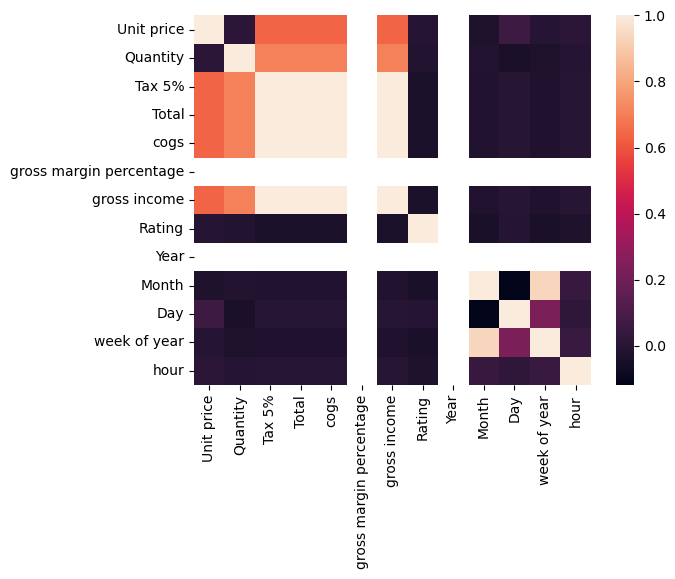

In [57]:
sns.heatmap(data.corr())

In [58]:
pd.crosstab(data['Customer type'], data['City'])

City,Mandalay,Naypyitaw,Yangon
Customer type,,,
Member,165,169,167
Normal,167,159,173


In [59]:
pd.crosstab(data['Customer type'], data['Gender'])

Gender,Female,Male
Customer type,,
Member,261,240
Normal,240,259


In [60]:
pd.crosstab(data['Gender'], data['City'])

City,Mandalay,Naypyitaw,Yangon
Gender,,,
Female,162,178,161
Male,170,150,179


In [61]:
pd.crosstab(data['City'], data['Product line'])

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
City,,,,,,
Mandalay,55,62,50,53,50,62
Naypyitaw,55,65,66,52,45,45
Yangon,60,51,58,47,65,59


In [62]:
pd.crosstab(data['City'], data['Payment'])

Payment,Cash,Credit card,Ewallet
City,,,
Mandalay,110,109,113
Naypyitaw,124,98,106
Yangon,110,104,126


In [63]:
pd.crosstab(data['Gender'], data['Payment'])

Payment,Cash,Credit card,Ewallet
Gender,,,
Female,178,163,160
Male,166,148,185


In [64]:
pd.crosstab(data['Gender'] , data['Product line'] , values= data['Total'], aggfunc= "sum")

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
Gender,,,,,,
Female,27102.0225,30437.400,33170.9175,18560.9865,30036.8775,28574.7210
Male,27235.5090,23868.495,22973.9265,30632.7525,23825.0355,26548.1055


In [65]:
pd.crosstab(data['Gender'], data['Month'], values= data['Total'], aggfunc= "sum")

Month,1,2,3
Gender,,,
Female,59138.982,56335.5555,52408.3875
Male,57152.886,40883.8185,57047.1195


In [66]:
pd.crosstab(data['Gender'], data['Name of Day'], values= data['Total'], aggfunc= "sum")

Name of Day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Gender,,,,,,,
Female,24147.8055,20412.0105,29330.2275,23100.7665,20523.510,30431.9715,19936.6335
Male,19778.5350,17487.0675,26790.5820,21357.1260,24825.738,21050.2740,23794.5015


In [67]:
data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,cogs,gross margin percentage,gross income,Rating,Year,Month,Day,Name of Day,week of year,hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,522.83,4.761905,26.1415,9.1,2019,1,5,Saturday,1,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,76.40,4.761905,3.8200,9.6,2019,3,8,Friday,10,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,324.31,4.761905,16.2155,7.4,2019,3,3,Sunday,9,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,465.76,4.761905,23.2880,8.4,2019,1,27,Sunday,4,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,604.17,4.761905,30.2085,5.3,2019,2,8,Friday,6,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,...,40.35,4.761905,2.0175,6.2,2019,1,29,Tuesday,5,13
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,...,973.80,4.761905,48.6900,4.4,2019,3,2,Saturday,9,17
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,...,31.84,4.761905,1.5920,7.7,2019,2,9,Saturday,6,13
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,...,65.82,4.761905,3.2910,4.1,2019,2,22,Friday,8,15


In [68]:
pd.crosstab(data['Gender'], data['Quantity'], values= data['Tax 5%'], aggfunc= "sum")

Quantity,1,2,3,4,5,6,7,8,9,10
Gender,,,,,,,,,,
Female,111.7875,247.932,354.9885,611.016,693.5875,864.723,1011.4790,987.464,1405.1025,1706.345
Male,194.9910,275.630,410.8065,591.266,594.5750,776.001,1067.7905,932.360,917.9190,1623.605


In [12]:
pd.crosstab(data['Gender'], data['Quantity'])

Quantity,1,2,3,4,5,6,7,8,9,10
Gender,,,,,,,,,,
Female,45,44,41,55,56,50,49,42,56,63
Male,67,47,49,54,46,48,53,43,36,56


In [70]:
data.groupby(['City','Gender']).agg({
    'Tax 5%' : 'sum',
    'Total' : 'sum'

})

Tax 5%       Total
City      Gender                       
Mandalay  Female  2520.3950  52928.2950
          Male    2536.6370  53269.3770
Naypyitaw Female  2937.4030  61685.4630
          Male    2327.7735  48883.2435
Yangon    Female  2536.6270  53269.1670
          Male    2520.5335  52931.2035

In [71]:
pd.crosstab(data['Gender'], round(data['Rating']))

Rating,4.0,5.0,6.0,7.0,8.0,9.0,10.0
Gender,,,,,,,
Female,60,68,83,74,101,65,50
Male,42,65,110,85,78,76,43


In [72]:
data.groupby(['City','Quantity']).agg({
    'Unit price' : 'sum',
    'Total' : 'sum',
    'Tax 5%' : 'sum'

})

Unit price       Total     Tax 5%
City      Quantity                                   
Mandalay  1            1914.88   2010.6240    95.7440
          2            1837.49   3858.7290   183.7490
          3            1930.15   6079.9725   289.5225
          4            1970.78   8277.2760   394.1560
          5            1555.04   8163.9600   388.7600
          6            2094.86  13197.6180   628.4580
          7            1643.50  12079.7250   575.2250
          8            1676.05  14078.8200   670.4200
          9            1941.35  18345.7575   873.6075
          10           1914.78  20105.1900   957.3900
Naypyitaw 1            2287.89   2402.2845   114.3945
          2            1822.87   3828.0270   182.2870
          3            1189.44   3746.7360   178.4160
          4            2004.54   8419.0680   400.9080
          5            1380.85   7249.4625   345.2125
          6            1526.16   9614.8080   457.8480
          7            2367.17  17398.6995   828.5095
          8            1584.77  13312.0680   633.9080
          9            1566.84  14806.6380   705.0780
          10           2837.23  29790.9150  1418.6150
Yangon    1            1932.80   2029.4400    96.6400
          2            1575.26   3308.0460   157.5260
          3            1985.71   6254.9865   297.8565
          4            2036.09   8551.5780   407.2180
          5            2216.76  11637.9900   554.1900
          6            1848.06  11642.7780   554.4180
          7            1930.10  14186.2350   675.5350
          8            1538.74  12925.4160   615.4960
          9            1654.08  15631.0560   744.3360
          10           1907.89  20032.8450   953.9450

In [73]:
data.groupby(['City','Day']).agg({
    'Tax 5%' : 'sum',
    'Total' : 'sum'

})

Tax 5%      Total
City     Day                     
Mandalay 1    117.6195  2470.0095
         2    302.1115  6344.3415
         3    184.1875  3867.9375
         4     83.1880  1746.9480
         5    238.8765  5016.4065
...                ...        ...
Yangon   27   246.5050  5176.6050
         28   125.0045  2625.0945
         29   119.1680  2502.5280
         30    76.9535  1616.0235
         31    28.0075   588.1575

[93 rows x 2 columns]

In [74]:
data.groupby(['City','Name of Day']).agg({
    'Tax 5%' : 'sum',
    'Total' : 'sum'

})

Tax 5%       Total
City      Name of Day                       
Mandalay  Friday        686.5600  14417.7600
          Monday        606.4145  12734.7045
          Saturday     1013.5440  21284.4240
          Sunday        495.9680  10415.3280
          Thursday      751.3630  15778.6230
          Tuesday       898.0590  18859.2390
          Wednesday     605.1235  12707.5935
Naypyitaw Friday        712.6055  14964.7155
          Monday        520.2530  10925.3130
          Saturday      860.5225  18070.9725
          Sunday        811.2260  17035.7460
          Thursday      673.7310  14148.3510
          Tuesday       841.3235  17667.7935
          Wednesday     845.5150  17755.8150
Yangon    Friday        692.5650  14543.8650
          Monday        678.0505  14239.0605
          Saturday      798.3530  16765.4130
          Sunday        809.8485  17006.8185
          Thursday      734.3940  15422.2740
          Tuesday       712.1530  14955.2130
          Wednesday     631.7965  13267.7265

In [75]:
data.groupby(['City','hour']).agg({
    'Tax 5%' : 'sum',
    'Total' : 'sum'

})

Tax 5%       Total
City      hour                      
Mandalay  10    422.1830   8865.8430
          11    499.1340  10481.8140
          12    403.5910   8475.4110
          13    536.7815  11272.4115
          14    556.8840  11694.5640
          15    487.6745  10241.1645
          16    196.3600   4123.5600
          17    373.3835   7841.0535
          18    455.0135   9555.2835
          19    774.4025  16262.4525
          20    351.6245   7384.1145
Naypyitaw 10    540.3440  11347.2240
          11    406.9345   8545.6245
          12    385.9715   8105.4015
          13    619.3840  13007.0640
          14    489.5915  10281.4215
          15    460.2210   9664.6410
          16    487.2870  10233.0270
          17    360.0205   7560.4305
          18    429.9065   9028.0365
          19    624.1335  13106.8035
          20    461.3825   9689.0325
Yangon    10    533.7340  11208.4140
          11    540.4710  11349.8910
          12    451.6700   9485.0700
          13    497.3215  10443.7515
          14    421.5435   8852.4135
          15    536.8430  11273.7030
          16    517.6065  10869.7365
          17    430.6540   9043.7340
          18    354.6200   7447.0200
          19    491.9170  10330.2570
          20    280.7800   5896.3800

In [76]:
data.groupby(['City','hour']).agg({
    'Tax 5%' : 'sum',
    'Total' : 'sum'

})

Tax 5%       Total
City      hour                      
Mandalay  10    422.1830   8865.8430
          11    499.1340  10481.8140
          12    403.5910   8475.4110
          13    536.7815  11272.4115
          14    556.8840  11694.5640
          15    487.6745  10241.1645
          16    196.3600   4123.5600
          17    373.3835   7841.0535
          18    455.0135   9555.2835
          19    774.4025  16262.4525
          20    351.6245   7384.1145
Naypyitaw 10    540.3440  11347.2240
          11    406.9345   8545.6245
          12    385.9715   8105.4015
          13    619.3840  13007.0640
          14    489.5915  10281.4215
          15    460.2210   9664.6410
          16    487.2870  10233.0270
          17    360.0205   7560.4305
          18    429.9065   9028.0365
          19    624.1335  13106.8035
          20    461.3825   9689.0325
Yangon    10    533.7340  11208.4140
          11    540.4710  11349.8910
          12    451.6700   9485.0700
          13    497.3215  10443.7515
          14    421.5435   8852.4135
          15    536.8430  11273.7030
          16    517.6065  10869.7365
          17    430.6540   9043.7340
          18    354.6200   7447.0200
          19    491.9170  10330.2570
          20    280.7800   5896.3800

In [77]:
data.groupby(['City','week of year']).agg({
    'Tax 5%' : 'sum',
    'Total' : 'sum'

})

Tax 5%       Total
City      week of year                      
Mandalay  1             273.1035   5735.1735
          2             386.4395   8115.2295
          3             336.7950   7072.6950
          4             425.6235   8938.0935
          5             474.3640   9961.6440
          6             444.6240   9337.1040
          7             462.4230   9710.8830
          8             276.8020   5812.8420
          9             630.2850  13235.9850
          10            451.4500   9480.4500
          11            350.2230   7354.6830
          12            283.0785   5944.6485
          13            261.8210   5498.2410
Naypyitaw 1             208.3190   4374.6990
          2             448.5535   9419.6235
          3             486.3500  10213.3500
          4             482.4370  10131.1770
          5             526.3435  11053.2135
          6             483.4290  10152.0090
          7             422.8490   8879.8290
          8             284.7145   5979.0045
          9             418.8140   8795.0940
          10            400.6780   8414.2380
          11            411.4760   8640.9960
          12            424.3790   8911.9590
          13            266.8340   5603.5140
Yangon    1             353.9770   7433.5170
          2             329.8260   6926.3460
          3             543.2055  11407.3155
          4             486.5530  10217.6130
          5             349.7900   7345.5900
          6             362.5105   7612.7205
          7             332.0420   6972.8820
          8             263.6580   5536.8180
          9             342.3160   7188.6360
          10            501.1500  10524.1500
          11            380.6925   7994.5425
          12            488.7615  10263.9915
          13            322.6785   6776.2485

In [78]:
round(data.groupby(['City','Gender', 'Product line']).agg({
    'Total' : 'sum',
    'Tax 5%' : 'sum'

}))

Total  Tax 5%
City      Gender Product line                           
Mandalay  Female Electronic accessories   8167.0   389.0
                 Fashion accessories      9081.0   432.0
                 Food and beverages      10510.0   500.0
                 Health and beauty        6400.0   305.0
                 Home and lifestyle       9557.0   455.0
                 Sports and travel        9213.0   439.0
          Male   Electronic accessories   8885.0   423.0
                 Fashion accessories      7332.0   349.0
                 Food and beverages       4705.0   224.0
                 Health and beauty       13580.0   647.0
                 Home and lifestyle       7992.0   381.0
                 Sports and travel       10775.0   513.0
Naypyitaw Female Electronic accessories   8969.0   427.0
                 Fashion accessories     11520.0   549.0
                 Food and beverages      15661.0   746.0
                 Health and beauty        6446.0   307.0
                 Home and lifestyle       7843.0   373.0
                 Sports and travel       11247.0   536.0
          Male   Electronic accessories  10000.0   476.0
                 Fashion accessories     10040.0   478.0
                 Food and beverages       8106.0   386.0
                 Health and beauty       10170.0   484.0
                 Home and lifestyle       6053.0   288.0
                 Sports and travel        4515.0   215.0
Yangon    Female Electronic accessories   9966.0   475.0
                 Fashion accessories      9836.0   468.0
                 Food and beverages       7000.0   333.0
                 Health and beauty        5715.0   272.0
                 Home and lifestyle      12637.0   602.0
                 Sports and travel        8115.0   386.0
          Male   Electronic accessories   8351.0   398.0
                 Fashion accessories      6496.0   309.0
                 Food and beverages      10163.0   484.0
                 Health and beauty        6883.0   328.0
                 Home and lifestyle       9780.0   466.0
                 Sports and travel       11258.0   536.0

# Visualization

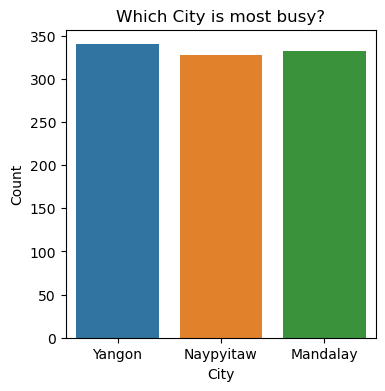

In [175]:
plt.figure(figsize=(4, 4))
sns.countplot(data['City'])
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Which City is most busy?')
A,B,C = data.City.value_counts()

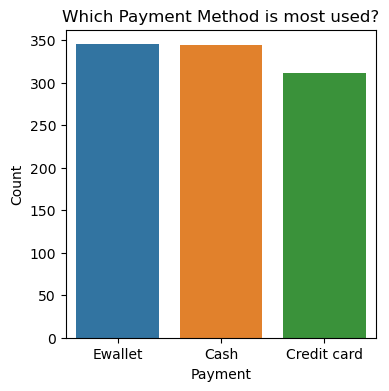

In [176]:
plt.figure(figsize=(4, 4))
sns.countplot(data['Payment'])
plt.xlabel('Payment')
plt.ylabel('Count')
plt.title('Which Payment Method is most used?')
plt.show()

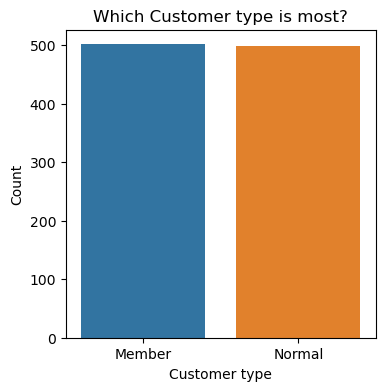

In [177]:
plt.figure(figsize=(4, 4))
sns.countplot(data['Customer type'])
plt.xlabel('Customer type')
plt.ylabel('Count')
plt.title('Which Customer type is most?')
plt.show()

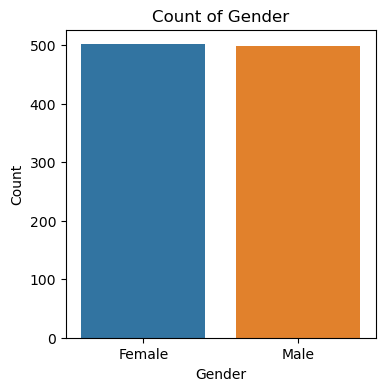

In [178]:
plt.figure(figsize=(4, 4))
sns.countplot(data['Gender'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Gender')
plt.show()

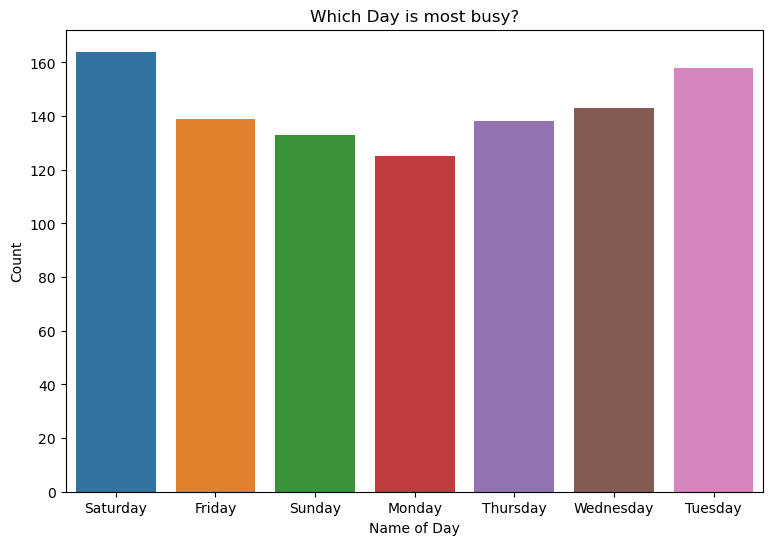

In [182]:
plt.figure(figsize=(9, 6))
sns.countplot(data['Name of Day'])
plt.xlabel('Name of Day')
plt.ylabel('Count')
plt.title('Which Day is most busy?')
plt.show()

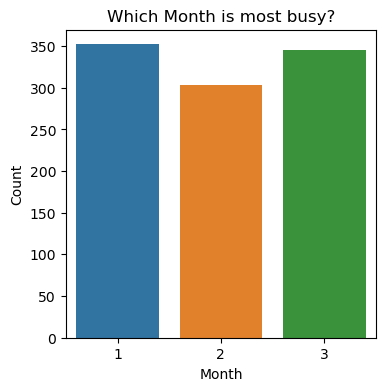

In [183]:
plt.figure(figsize=(4, 4))
sns.countplot(data['Month'])
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Which Month is most busy?')
plt.show()

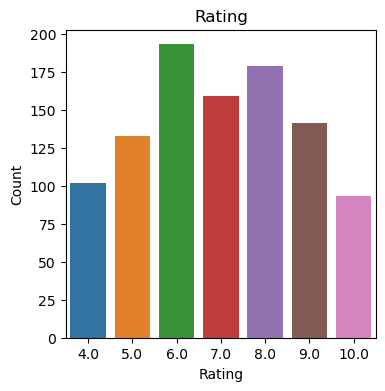

In [184]:
plt.figure(figsize=(4, 4))
sns.countplot(round(data['Rating']))
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating')
plt.show()

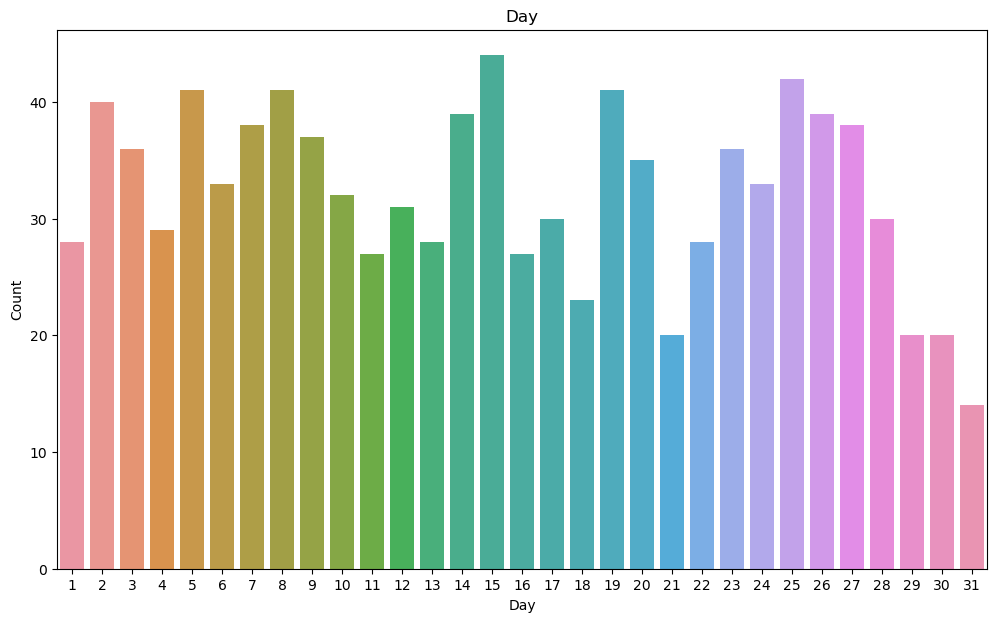

In [166]:
plt.figure(figsize=(12, 7))
sns.countplot(data['Day'])
plt.xlabel('Day')
plt.ylabel('Count')
plt.title('Day')
plt.show()

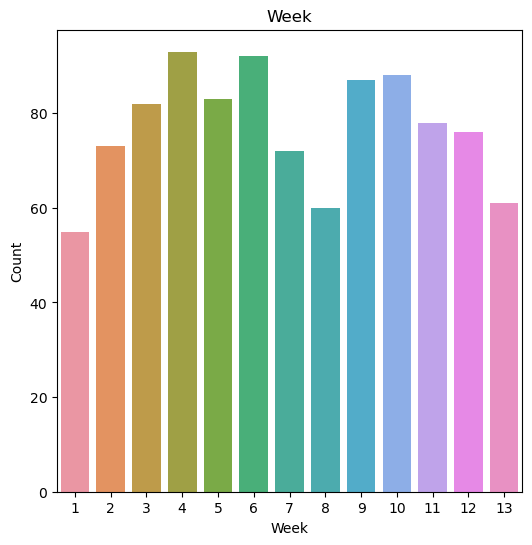

In [186]:
plt.figure(figsize=(6, 6))
sns.countplot(data['week of year'])
plt.xlabel('Week')
plt.ylabel('Count')
plt.title('Week')
plt.show()

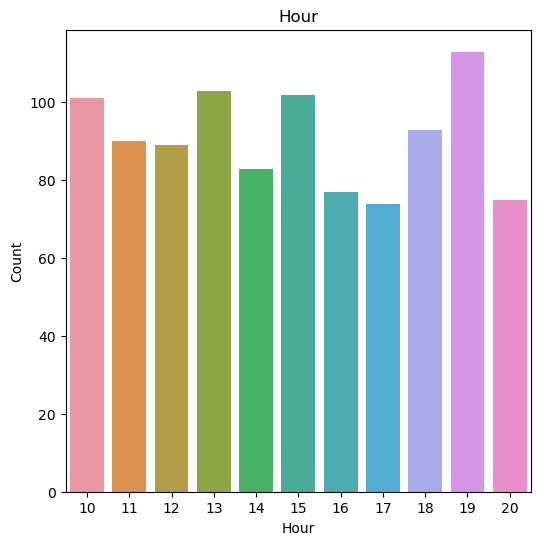

In [187]:
plt.figure(figsize=(6, 6))
sns.countplot(data['hour'])
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Hour')
plt.show()

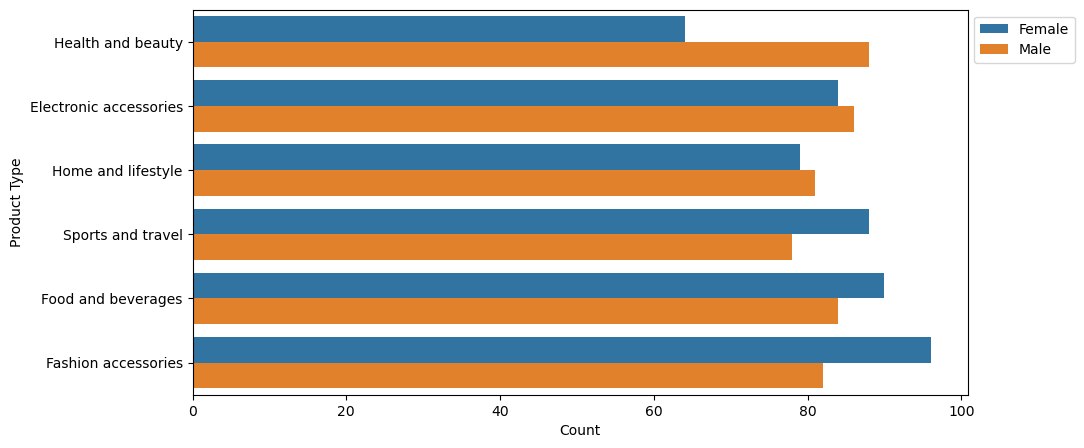

In [156]:
plt.figure(figsize=(10, 5))
sns.countplot(y ='Product line', hue = "Gender", data = data) 
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

<Figure size 800x600 with 0 Axes>

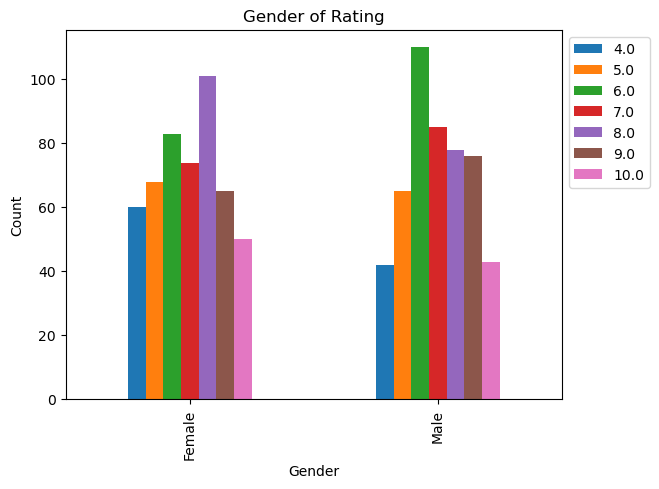

In [188]:
plt.figure(figsize=(8, 6))
Gender_rating = pd.crosstab(data['Gender'], round(data['Rating']))
Gender_rating.plot(kind='bar')
plt.title('Gender of Rating')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

<Figure size 800x600 with 0 Axes>

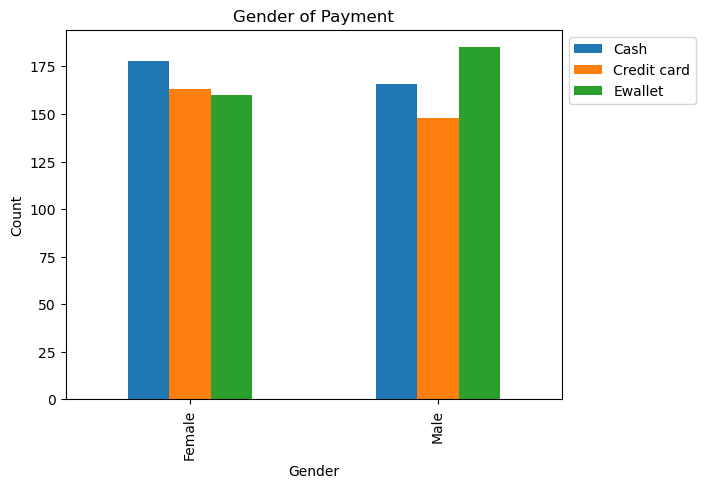

In [189]:
Gender_Payment = pd.crosstab(data['Gender'], data['Payment'])
plt.figure(figsize=(8, 6))
Gender_Payment.plot(kind='bar')
plt.title('Gender of Payment')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

<Figure size 800x600 with 0 Axes>

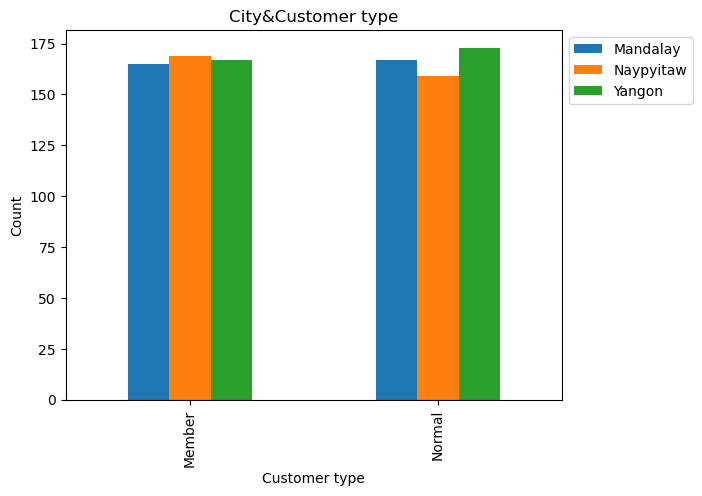

In [190]:
City_Customer_type = pd.crosstab(data['Customer type'], data['City'])
plt.figure(figsize=(8, 6))
City_Customer_type.plot(kind='bar')
plt.title('City&Customer type')
plt.xlabel('Customer type')
plt.ylabel('Count')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

<Figure size 1000x800 with 0 Axes>

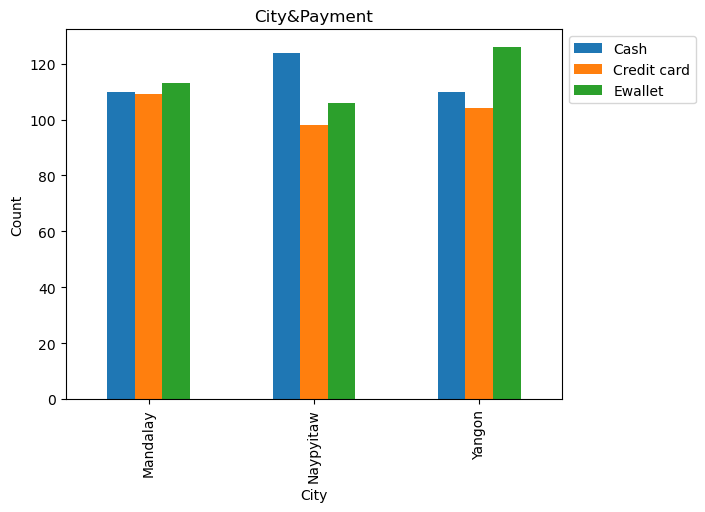

In [192]:
city_payment =  pd.crosstab(data['City'], data['Payment'])
plt.figure(figsize=(10, 8))
city_payment.plot(kind='bar')
plt.title('City&Payment')
plt.xlabel('City')
plt.ylabel('Count')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

<Figure size 1000x800 with 0 Axes>

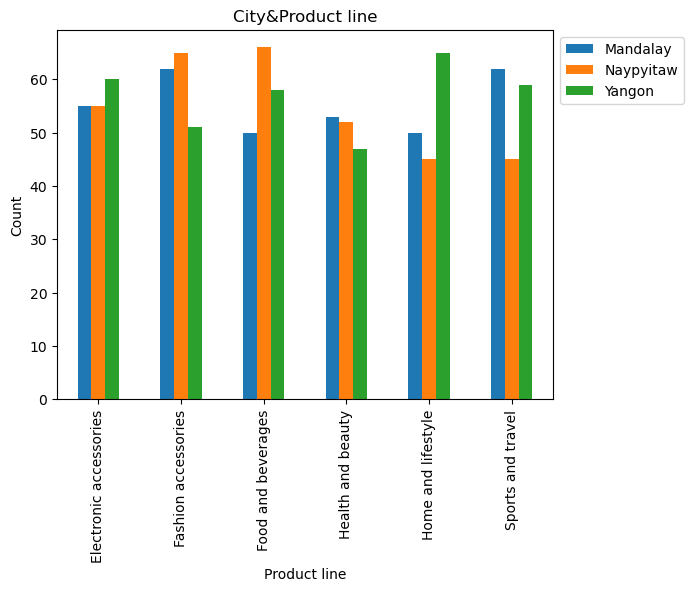

In [193]:
city_Product_line = pd.crosstab(data['Product line'], data['City'])
plt.figure(figsize=(10, 8))
city_Product_line.plot(kind='bar')
plt.title('City&Product line')
plt.xlabel('Product line')
plt.ylabel('Count')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

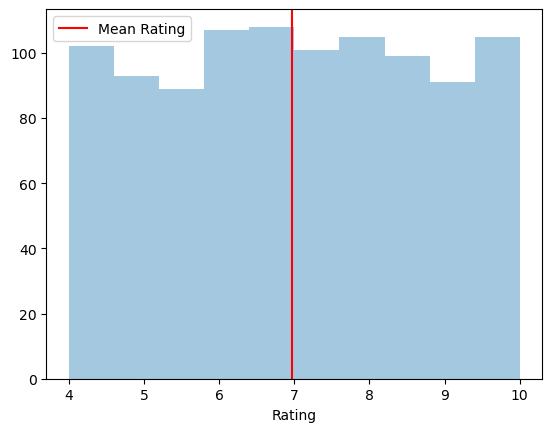

In [158]:
plt.figure(dpi=100)
sns.distplot(data['Rating'],kde=False)
plt.axvline(x=np.mean(data['Rating']),c='red',label='Mean Rating')
plt.legend()
plt.show()


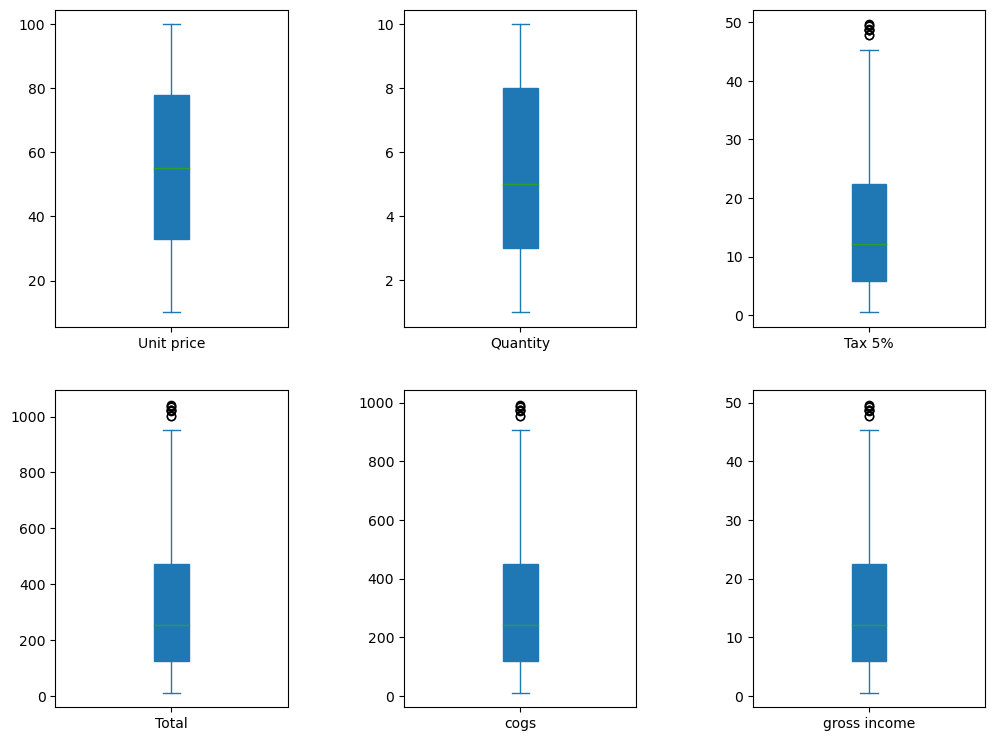

In [214]:
numeric_plot = data[['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross income']]

numeric_plot.plot(subplots =True, kind = 'box', layout = (3,3), figsize = (12,14),patch_artist=True)
plt.subplots_adjust(wspace = 0.5)